# Leitura dos dados (perfil tributários)

In [107]:
%%capture
# !pip install --upgrade xlrd

import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np


In [2]:
meses = ['marco', 'abril', 'maio',
         'junho', 'julho', 'agosto',
         'setembro', 'outubro', 'novembro',
         'dezembro']

dicionario = {}
cont = 3

for i in range(0, len(meses)):
    leitura = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispers%C3%A3o-e-qualidade-da-%C3%A1gua/arquivos/perfil-tributarios-verde-' + str(cont) + '-2010.xls?raw=true')
    dicionario[meses[i]] = leitura
    cont += 1

In [3]:
nome_variaveis = dicionario['marco'].iloc[0].index.tolist()
nome_variaveis = nome_variaveis[3:]
print(nome_variaveis)

# Pegando apenas os dados que interessam
dicionario[meses[-1]].loc[1:24, 'Prof.':].head()

['pH', 'Condutividade', 'Turbidez', 'Oxigênio dissolvido', 'temperatura', 'TDS', 'ORP', 'Secchi', 'Fósforo total', 'Fósforo reativo', 'Nitrog amonical', 'Nitrog total', 'Nitrito', 'Nitrato', 'Silicato']


,Prof.,pH,Condutividade,Turbidez,Oxigênio dissolvido,temperatura,TDS,ORP,Secchi,Fósforo total,Fósforo reativo,Nitrog amonical,Nitrog total,Nitrito,Nitrato,Silicato
1,0,7.42,erro,0.3,7.21,24.4,erro,70,2.55,19.085818,9.410115,201.243576,237.44289,169.725892,4.116842,3198.47094
2,0.5,7.43,erro,0.3,7.16,24.4,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4.43,erro,0.1,7.16,24.4,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.5,7.43,erro,0.3,7.13,24.3,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,7.44,erro,0.3,7,24.3,NaN,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dados estação barragem

In [6]:
dados_barragem = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispers%C3%A3o-e-qualidade-da-%C3%A1gua/arquivos/estacao-barragem.xls?raw=true')
dados_barragem.head()

,Dia,Mês,Ano,Data,Hora-min,Vel. Vento média (m/s),Dir. Vento media (graus),Temp. média (ºC),Umid. rel. média (%),Rad. solar (W/m2),Vento norte médio (m/s),Vento leste médio(m/s),Dir. vento calculada (graus),Rajada máx. (m/s),Rajada min. (m/s),Temp. máx. (ºC),Temp. min. (ºC),Prec. (mm)
0,1,1,2010,2010-01-01,0,4.346,137.4,16.94,90.9,0.837,-3.141,2.892,137.4,6.860,2.401,17.19,16.74,0.0
1,1,1,2010,2010-01-01,15,3.446,137.4,16.97,90.7,0.838,-2.483,2.269,137.4,5.096,1.568,17.23,16.67,0.0
2,1,1,2010,2010-01-01,30,3.711,133.6,16.96,91.3,0.838,-2.520,2.634,133.6,6.370,1.274,17.20,16.73,0.0
3,1,1,2010,2010-01-01,45,3.625,134.8,16.88,91.5,0.838,-2.522,2.521,134.8,5.831,1.519,17.21,16.64,0.0
4,1,1,2010,2010-01-01,100,3.794,120.5,16.99,91.8,0.838,-1.878,3.212,120.5,6.223,1.372,17.25,16.76,0.0


In [5]:
# Exemplo apenas para pegar os dados
lista = []
for i in range(1, 13):
  var = dados_barragem[dados_barragem['Mês'] == i]['Vel. Vento média (m/s)']
  lista.append(round(var.mean(), 2))

maior = len(str(lista[0]))
for l in lista:
  if len(str(l)) > maior:
    maior = len(str(l))

cont = 1
for l in lista:
  print(f'{l} \t{" " * maior if len(str(l)) < maior - 1 else ""}{cont}')
  cont += 1

2.61 	        1
-26.22 	        2
-155.02 	3
-230.94 	4
-164.69 	5
-184.62 	6
-2.07 	        7
-15.96 	        8
-6.4 	        9
-2307.29 	10
3.0 	        11
0.57 	        12


In [21]:
dados_barragem["Prec. (mm)"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
35035    0.0
35036    0.0
35037    0.0
35038    0.0
35039    0.0
Name: Prec. (mm), Length: 35040, dtype: float64

In [23]:
dados_barragem[dados_barragem["Prec. (mm)"]<0] 

,Dia,Mês,Ano,Data,Hora-min,Vel. Vento média (m/s),Dir. Vento media (graus),Temp. média (ºC),Umid. rel. média (%),Rad. solar (W/m2),Vento norte médio (m/s),Vento leste médio(m/s),Dir. vento calculada (graus),Rajada máx. (m/s),Rajada min. (m/s),Temp. máx. (ºC),Temp. min. (ºC),Prec. (mm)
4432,16,2,2010,2010-02-16,400,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0
4433,16,2,2010,2010-02-16,415,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0
4434,16,2,2010,2010-02-16,430,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0
4435,16,2,2010,2010-02-16,445,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0
4436,16,2,2010,2010-02-16,500,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28390,23,10,2010,2010-10-23,1730,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0
28391,23,10,2010,2010-10-23,1745,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0
28392,23,10,2010,2010-10-23,1800,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0
28393,23,10,2010,2010-10-23,1815,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0


In [ ]:
## Substituir dados pluviométricos com erro

dados_barragem[dados_barragem["Prec. (mm)"]<0] # Checar linhas com valores de interesse

# como os valores ocorrendo o erro são todos -6999.0 a substituição ocorre desta forma

dados_barragem1 = dados_barragem.replace(to_replace = -6999.0, value = 0)

# Conferir as alterações

dados_barragem1.iloc[27555] 


In [130]:
dados_acumulados = dados_barragem1.groupby(by=['Data']).sum()
chuva_acumulada_diaria = pd.DataFrame(dados_acumulados['Prec. (mm)'])
chuva_acumulada_diaria # mm/d

# chuva_acumulada_diaria
chuva_acumulada_diaria_certa = chuva_acumulada_diaria['Prec. (mm)'][59:]
# chuva_acumulada_diaria_certa

Data
2010-03-01     0.762
2010-03-02     0.000
2010-03-03     0.000
2010-03-04     1.270
2010-03-05    27.432
               ...  
2010-12-27     0.000
2010-12-28     0.000
2010-12-29     0.000
2010-12-30     0.000
2010-12-31     0.000
Name: Prec. (mm), Length: 306, dtype: float64

In [104]:
# Tratar dados vazão

dados_vazao = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispers%C3%A3o-e-qualidade-da-%C3%A1gua/arquivos/vazaoSWAT_entradaSisBaHiA.xls?raw=true')

dados_vazao1 = dados_vazao[["ponto", "Dia", "F4", "TD4", "TE10"]].copy()
dados_vazao1


# dados_vazao1[dados_vazao1["F4"]<0]  Conferir erro na planilha

vazao_media_anual = dados_vazao1.sum()

# vazao_media_anual

vazao_media_diaria = vazao_media_anual / 366 # m³/s

vazao_media_diaria_2 = vazao_media_diaria * 86400 #m³/d

vazao_media_diaria_2
# vazao_media_diaria
 



ponto    1.354911e+12
Dia      1.568184e+07
F4       1.720073e+05
TD4      3.937236e+04
TE10     1.230634e+04
dtype: float64

In [119]:
# Evaporação pela equação de Thornthwaite

# E = 16 * (10*T/I) ** a
# I = soma(T_(1 a 12)/5)**1,514
# a = 6.75*(10**-7) * (I ** 3) - 7.71 * (10**-5) * (I**2) + 1,792 * (10**-2) * I + 0.49239

# Temperatura média do mês (ºC)

dados_acumulados1 = dados_barragem1.groupby(by=['Data']).mean()
temp_media_dia = pd.DataFrame(dados_acumulados1['Temp. média (ºC)'])

# temp_media_dia.iloc[0:31]

temp_media_mes1 = temp_media_dia.iloc[0:31].mean()
temp_media_mes2 = temp_media_dia.iloc[32:62].mean()
temp_media_mes3 = temp_media_dia.iloc[63:94].mean()
temp_media_mes4 = temp_media_dia.iloc[95:125].mean()
temp_media_mes5 = temp_media_dia.iloc[126:157].mean()
temp_media_mes6 = temp_media_dia.iloc[157:187].mean()
temp_media_mes7 = temp_media_dia.iloc[188:219].mean()
temp_media_mes8 = temp_media_dia.iloc[220:251].mean()
temp_media_mes9 = temp_media_dia.iloc[252:282].mean()
temp_media_mes10 = temp_media_dia.iloc[283:314].mean()
temp_media_mes11 = temp_media_dia.iloc[315:345].mean()
temp_media_mes12 = temp_media_dia.iloc[345:376].mean()

temp_media_mes_dict = {'Mês' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'Temp. média (ºC)' : [temp_media_mes1, temp_media_mes2, temp_media_mes3, temp_media_mes4, temp_media_mes5, temp_media_mes6, temp_media_mes7, temp_media_mes8, temp_media_mes9, temp_media_mes10, temp_media_mes11, temp_media_mes12]}

temp_media_mes = pd.DataFrame(temp_media_mes_dict)

# temp_media_mes['Mês','Temp. média (ºC)'] = 

# temp_media_mes_dict

temp_media_mes # descobrir como tirar os valores além da temperatura

# Determinando valor de I

I = (21.259224/5)**1.514 + (21.699927/5)**1.514 + (20.12336/5)**1.514 +(16.491354/5)**1.514 +(13.600744/5)**1.514 +(13.770589/5)**1.514 +(13.479297/5)**1.514 +(15.204781/5)**1.514 + (15.994973/5)**1.514 + (11.824963/5)**1.514 + (19.340333/5)**1.514 + (19.749505/5)**1.514 

# Determinando valor de a

a = 6.75 * (10**-7) * (I ** 3) - 7.71 * (10**-5) * (I**2) + 1.792 * (10**-2) * I + 0.49239

# Determinando valor de E para cada mês (mm/mes)

E1 = 16 * (10*21.259224/I) ** a
E2 = 16 * (10*21.699927/I) ** a
E3 = 16 * (10*20.12336/I) ** a
E4 = 16 * (10*16.491354/I) ** a
E5 = 16 * (10*13.600744/I) ** a
E6 = 16 * (10*13.770589/I) ** a
E7 = 16 * (10*13.479297/I) ** a
E8 = 16 * (10*15.204781/I) ** a
E9 = 16 * (10*15.994973/I) ** a
E10 = 16 * (10*11.824963/I) ** a
E11 = 16 * (10*19.340333/I) ** a
E12 = 16 * (10*19.749505/I) ** a

# Evapotranspiração em mm/d

E_mes = np.array([E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12])

E_dia = E_mes/30

E_mar = np.repeat(E_dia[2], 31)
E_abr = np.repeat(E_dia[3], 30)
E_mai = np.repeat(E_dia[4], 31)
E_jun = np.repeat(E_dia[5], 30)
E_jul = np.repeat(E_dia[6], 31)
E_ago = np.repeat(E_dia[7], 31)
E_set = np.repeat(E_dia[8], 30)
E_out = np.repeat(E_dia[9], 31)
E_nov = np.repeat(E_dia[10], 30)
E_dez = np.repeat(E_dia[11], 31)

E_mes_dia = np.concatenate([E_mar, E_abr, E_mai, E_jun, E_jul, E_ago, E_set, E_out, E_nov, E_dez ]) # array com valores diários de evapotranspiração variavel em cada mes

# E_mes_dia



ValueError: No engine for filetype: 'xlxs'

## Dados para interpolação

In [7]:
dados_interpolacao = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispers%C3%A3o-e-qualidade-da-%C3%A1gua/arquivos/dados-para-interpolacao.xlsx?raw=true')
dados_interpolacao.head()

,data,OD (mg/L),temperatura (ºC),TDS (g/L),ORP (mV),fosforo_total (ug/L),fosforo_reativo (ug/L),nitrog_amoniacal (ug/L),nitrog_total (ug/L),nitrito (ug/L),nitrato (ug/L),silicato (ug/L)
0,2010-03-01,3.774,21.235,0.095,-48.85,21.352618,3.745672,182.048386,187.302495,2.147887,49.090286,1324.85741
1,2010-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
nome = ['OD (mg/L)', 'temperatura (ºC)', 'fosforo_total (ug/L)',
        'fosforo_reativo (ug/L)', 'nitrog_amoniacal (ug/L)', 'nitrog_total (ug/L)',
        'nitrito (ug/L)', 'nitrato (ug/L)', 'silicato (ug/L)']

data_frame = pd.DataFrame(dados_interpolacao['data'])

for n in nome:
    interpolado = pd.DataFrame(dados_interpolacao[n]).interpolate(method='cubic')
    data_frame = data_frame.join(interpolado)

# Dado do curso principal do reservatório do Verde
data_frame.head()

,data,OD (mg/L),temperatura (ºC),fosforo_total (ug/L),fosforo_reativo (ug/L),nitrog_amoniacal (ug/L),nitrog_total (ug/L),nitrito (ug/L),nitrato (ug/L),silicato (ug/L)
0,2010-03-01,3.774000,21.235000,21.352618,3.745672,182.048386,187.302495,2.147887,49.090286,1324.857410
1,2010-03-02,3.894578,21.224405,20.950886,3.456875,181.955551,183.000000,1.882985,39.828984,1364.159152
2,2010-03-03,4.009641,21.213103,20.571584,3.189887,181.953629,178.962335,1.638858,31.121809,1403.831892
3,2010-03-04,4.119306,21.201091,20.214183,2.944229,182.041200,175.184238,1.415051,22.958818,1443.853521
4,2010-03-05,4.223686,21.188366,19.878152,2.719422,182.216848,171.660446,1.211111,15.330069,1484.201925


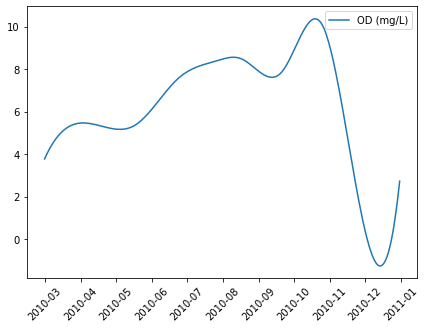

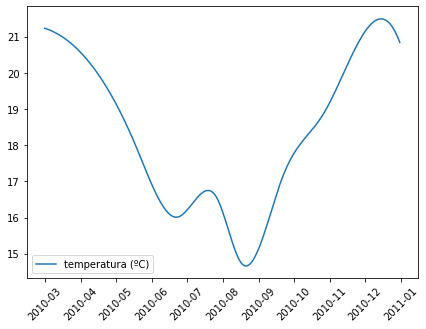

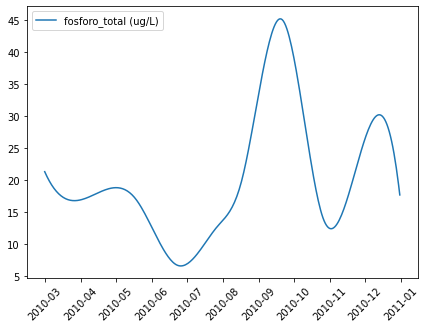

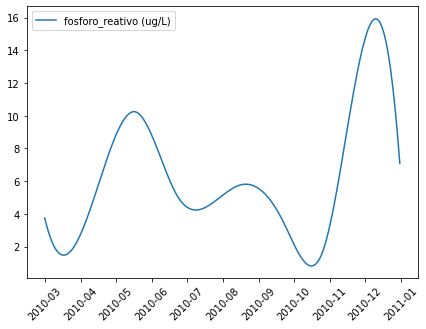

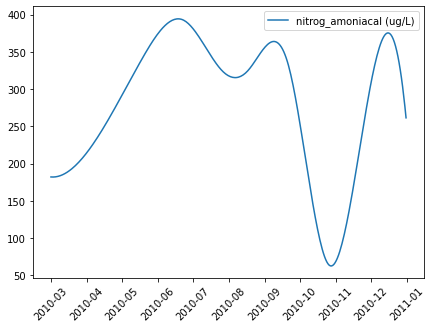

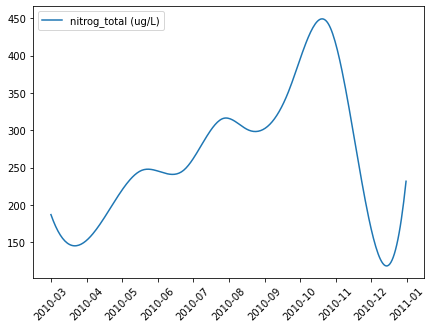

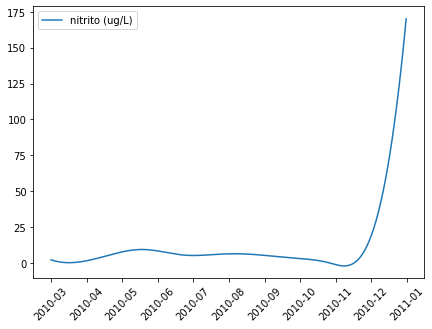

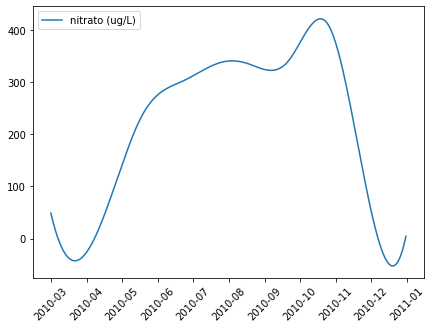

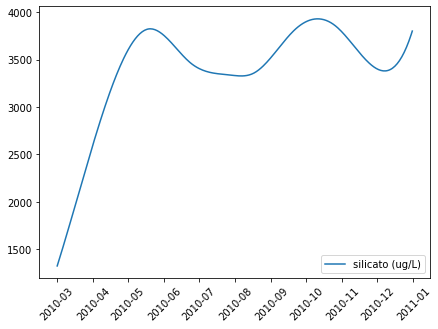

In [9]:
for i in range(len(nome)):
  plt.figure(figsize=(7, 5))
  plt.plot(data_frame['data'], data_frame[nome[i]], label=nome[i])
  plt.xticks(rotation=45)
  plt.legend(loc='best')
  plt.show()

## Leitura e interpolação dos dados dos tributários

In [10]:
df_trib_F4 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispers%C3%A3o-e-qualidade-da-%C3%A1gua/arquivos/dados-para-interpolacao-todos.xlsx?raw=true', 'trib_F4')
df_trib_TE_10 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispers%C3%A3o-e-qualidade-da-%C3%A1gua/arquivos/dados-para-interpolacao-todos.xlsx?raw=true', 'trib_TE_10')
df_trib_TD_4 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispers%C3%A3o-e-qualidade-da-%C3%A1gua/arquivos/dados-para-interpolacao-todos.xlsx?raw=true', 'trib_TD_4')
df_trib_F5 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispers%C3%A3o-e-qualidade-da-%C3%A1gua/arquivos/dados-para-interpolacao-todos.xlsx?raw=true', 'trib_F5')

df_trib_F4.head()

,data,Oxigênio dissolvido,temperatura,TDS,ORP,Fósforo total,Fósforo reativo,Nitrogênio amonical,Nitrogênio total,Nitrito,Nitrato,Silicato
0,2010-03-01,9.0,21.6,0.1,84.0,42.0,9.46,141.0,182.0,19.18,278.0,2402.93
1,2010-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
nomes_tributarios = ['Oxigênio dissolvido', 'temperatura',
                     'Fósforo total', 'Nitrogênio amonical',
                     'Nitrogênio total', 'Nitrito', 'Nitrato',
                     'Silicato']

In [12]:
# Trib_F4
df_trib_F4_interpolado = pd.DataFrame(df_trib_F4['data'])
for nt in nomes_tributarios:

    interpolado = pd.DataFrame(df_trib_F4[nt]).interpolate(method='cubic') 

    df_trib_F4_interpolado = df_trib_F4_interpolado.join(interpolado)

df_trib_F4_interpolado.head()

,data,Oxigênio dissolvido,temperatura,Fósforo total,Nitrogênio amonical,Nitrogênio total,Nitrito,Nitrato,Silicato
0,2010-03-01,9.000000,21.600000,42.000000,141.000000,182.000000,19.180000,278.000000,2402.930000
1,2010-03-02,9.083115,21.507449,40.334717,139.707900,183.117055,18.818266,274.956063,2419.602101
2,2010-03-03,9.161270,21.416422,38.777921,138.364800,184.162667,18.456639,271.858256,2432.894026
3,2010-03-04,9.234555,21.326877,37.327221,136.974574,185.138575,18.095313,268.710026,2442.907992
4,2010-03-05,9.303058,21.238774,35.980227,135.541095,186.046521,17.734485,265.514820,2449.746217


In [13]:
# Trib_TE_10
df_trib_TE_10_interpolado = pd.DataFrame(df_trib_TE_10['data'])

for nt in nomes_tributarios:

    interpolado = pd.DataFrame(df_trib_TE_10[nt]).interpolate(method='cubic') 

    df_trib_TE_10_interpolado = df_trib_TE_10_interpolado.join(interpolado)

df_trib_TE_10_interpolado.head()

,data,Oxigênio dissolvido,temperatura,Fósforo total,Nitrogênio amonical,Nitrogênio total,Nitrito,Nitrato,Silicato
0,2010-03-01,8.300000,21.200000,27.600000,373.000000,182.000000,9.750000,293.000000,1602.410000
1,2010-03-02,8.084882,21.148396,28.414488,368.901534,182.915933,10.147473,289.600681,1725.986679
2,2010-03-03,7.884556,21.097017,29.220441,364.626116,183.781143,10.542232,286.151265,1848.232268
3,2010-03-04,7.698697,21.045839,30.017696,360.182014,184.596798,10.934147,282.655270,1969.122765
4,2010-03-05,7.526980,20.994840,30.806089,355.577495,185.364067,11.323089,279.116214,2088.634164


In [14]:
# Trib_TD_4
df_trib_TD_4_interpolado = pd.DataFrame(df_trib_TD_4['data'])

for nt in nomes_tributarios:

    interpolado = pd.DataFrame(df_trib_TD_4[nt]).interpolate(method='cubic') 

    df_trib_TD_4_interpolado = df_trib_TD_4_interpolado.join(interpolado)

df_trib_TD_4_interpolado.head()

,data,Oxigênio dissolvido,temperatura,Fósforo total,Nitrogênio amonical,Nitrogênio total,Nitrito,Nitrato,Silicato
0,2010-03-01,8.300000,20.900000,27.100000,359.000000,192.000000,4.970000,306.000000,3216.050000
1,2010-03-02,8.335064,20.882341,25.714408,349.447988,192.073618,5.164121,301.942710,3220.829473
2,2010-03-03,8.368285,20.863274,24.422987,339.999993,192.133805,5.353565,297.861179,3226.714603
3,2010-03-04,8.399690,20.842809,23.223754,330.658902,192.180964,5.538380,293.758432,3233.666337
4,2010-03-05,8.429310,20.820958,22.114727,321.427599,192.215497,5.718612,289.637498,3241.645618


In [15]:
# Trib_F5
df_trib_F5_interpolado = pd.DataFrame(df_trib_TD_4['data'])

for nt in nomes_tributarios:
    interpolado = pd.DataFrame(df_trib_F5[nt]).interpolate(method='cubic') 

    df_trib_F5_interpolado = df_trib_F5_interpolado.join(interpolado)

df_trib_F5_interpolado.head()

,data,Oxigênio dissolvido,temperatura,Fósforo total,Nitrogênio amonical,Nitrogênio total,Nitrito,Nitrato,Silicato
0,2010-03-01,8.800000,22.700000,24.200000,70.000000,184.000000,4.050000,84.000000,2774.940000
1,2010-03-02,8.858064,22.717267,23.733918,74.903103,184.902381,4.076134,88.028174,2801.828111
2,2010-03-03,8.912644,22.731175,23.281390,79.758485,185.742940,4.102255,91.701755,2829.169693
3,2010-03-04,8.963811,22.741773,22.842238,84.566654,186.523219,4.128348,95.030212,2856.935041
4,2010-03-05,9.011631,22.749108,22.416284,89.328117,187.244759,4.154400,98.023019,2885.094447


# Modelagem

In [16]:
# Apenas pegando os dados de temperatura de um dos tributários
# Poderia ser de qualquer um, ou do reservatório

temperatura_trib_F4_interpolado = df_trib_F4_interpolado['temperatura'].to_numpy()

T = temperatura_trib_F4_interpolado

In [17]:
# Pegando do reservatório

T = data_frame['temperatura (ºC)'].to_numpy()

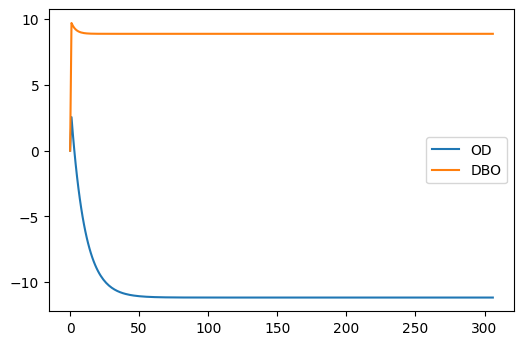

[304.9967213114754, 306.0]


In [18]:
# Teste https://www.youtube.com/watch?v=VV3BnroVjZo&ab_channel=APMonitor.com
import numpy as np
from scipy.integrate import odeint


# Função pro odeint
def model(z, t, temp):
    o = z[0]
    L = z[1]
    
    # Variáveis
    V = 1 # chute
    os = 8 # chute
    ka = 0.1 # chute
    kra = 0.01 # chute
    krz = 0.02 # chute
    kn = 2 # chute
    ksed = 0.02 # chute
    roc = 2.6667 # gOD/gC
    SOD = 1 # chute
    rca = 1 # chute
    pa = 1 # chute
    alpha = 0.001 # chute
    LN = 1 # chute
    L0 = 10 # chute
    Lpart = 1 # chute
    Czooplancton = 1 # chute
    roa = 0 # chute
    roi = 0 # chute
    ron = roa + roi # chute
    z = 1 # chute
    
    # Condição H:
    H = 3 # chute
    if 0 <= H <= 2.4:
        kd = 0.3 * (H / 2.4) ** (- 0.434)
    elif H > 2.4:
        kd = 0.3
    
    # Correção da temperatura
    kdz_20 = 1 # chute
    theta = 1 # chute
    
    kdz = kdz_20 * theta ** (temp - 20)
    
    # Equações OD:
    dodt_termo_1 = ka * V * (os - o)
    dodt_termo_2 = - kd * V * L0 * np.exp(- kd * t)
    dodt_termo_3 = - ron * V * kn * LN
    dodt_termo_4 = pa * V
    dodt_termo_5 = - rca * roc * V * kra * alpha
    dodt_termo_6 = roc * V * krz * Czooplancton
    dodt_termo_7 = V * (- SOD / H)

    dodt = (dodt_termo_1 + dodt_termo_2 + dodt_termo_3 + dodt_termo_4 + dodt_termo_5 + dodt_termo_7) / V

    # Equações DBO:
    dLdt_termo_1 = - kd * V * L
    dLdt_termo_2 = - ksed * (1 - Lpart) * L
    dLdt_termo_3 = rca * roc * V * kra * alpha
    dLdt_termo_4 = roc * V * kdz * z

    dLdt = dLdt_termo_1 + dLdt_termo_2 + dLdt_termo_3 + dLdt_termo_4
    
    return [dodt, dLdt]


# Condição inicial
z0 = [4, 10]

# Marcha no tempo
n = len(T)
t = np.linspace(0, n, n)
temp = np.array(T)

o = np.zeros(n)
L = np.zeros(n)

# Resolvendo a EDO
for i in range(1, n):
    tspan = [t[i - 1], t[i]]
    z = odeint(model, z0, t, args=(temp[i],))
    z0 = z[1]
    o[i] = z0[0]
    L[i] = z0[1]

plt.figure(dpi=100)
plt.plot(t, o, label='OD')
plt.plot(t, L, label='DBO')
plt.legend()
plt.show()

print(tspan)

# Acurácia do modelo

## $R^2$

In [19]:
from sklearn.metrics import r2_score

In [20]:
OD_medido = data_frame['OD (mg/L)'] # y_true
OD_modelo = o # y_pred

print(f'The R2 is {r2_score(OD_medido, OD_modelo):.2f}')

The R2 is -35.65


## Mean Squared Error (MSE)

$MSE = \frac{1}{n} \sum_{i=1}^n (y_{i} - \bar{y_i})^{2}$

Where: $n$: the total number os terms for which the error is to be calculated; $y_i$: the observed value of the variable; $\bar{y_{i}}$: the predicted value of the variable.

In [21]:
OD_medido = data_frame['OD (mg/L)'] # y
OD_modelo = o # y_bar
soma = 0

n = len(OD_medido)

for i in range(0, n):
    diferenca = OD_medido[i] - OD_modelo[i]
    quadrado_da_diferenca = diferenca ** 2
    soma += quadrado_da_diferenca

MSE = soma / n

print(f'The Mean Square Error is {MSE:.2f}')

The Mean Square Error is 297.23


## Pearson Correlation

Correlação de Pearson:
[[ 1.         -0.15533765]
 [-0.15533765  1.        ]]


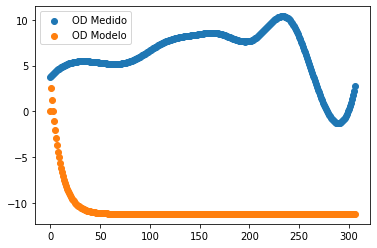

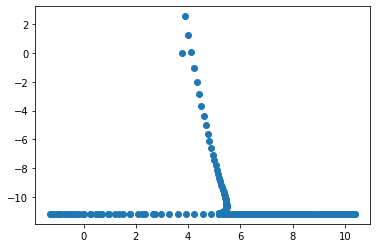

In [22]:
correlation = np.corrcoef(OD_medido, OD_modelo)

print(f'Correlação de Pearson:\n{correlation}')

plt.scatter(t, OD_medido, label='OD Medido')
plt.scatter(t, OD_modelo, label='OD Modelo')
plt.legend()
plt.show()

plt.scatter(OD_medido, OD_modelo)
plt.show()

In [23]:
dados_barragem.head()

,Dia,Mês,Ano,Data,Hora-min,Vel. Vento média (m/s),Dir. Vento media (graus),Temp. média (ºC),Umid. rel. média (%),Rad. solar (W/m2),Vento norte médio (m/s),Vento leste médio(m/s),Dir. vento calculada (graus),Rajada máx. (m/s),Rajada min. (m/s),Temp. máx. (ºC),Temp. min. (ºC),Prec. (mm)
0,1,1,2010,2010-01-01,0,4.346,137.4,16.94,90.9,0.837,-3.141,2.892,137.4,6.860,2.401,17.19,16.74,0.0
1,1,1,2010,2010-01-01,15,3.446,137.4,16.97,90.7,0.838,-2.483,2.269,137.4,5.096,1.568,17.23,16.67,0.0
2,1,1,2010,2010-01-01,30,3.711,133.6,16.96,91.3,0.838,-2.520,2.634,133.6,6.370,1.274,17.20,16.73,0.0
3,1,1,2010,2010-01-01,45,3.625,134.8,16.88,91.5,0.838,-2.522,2.521,134.8,5.831,1.519,17.21,16.64,0.0
4,1,1,2010,2010-01-01,100,3.794,120.5,16.99,91.8,0.838,-1.878,3.212,120.5,6.223,1.372,17.25,16.76,0.0


# Modelando o fósforo

35040


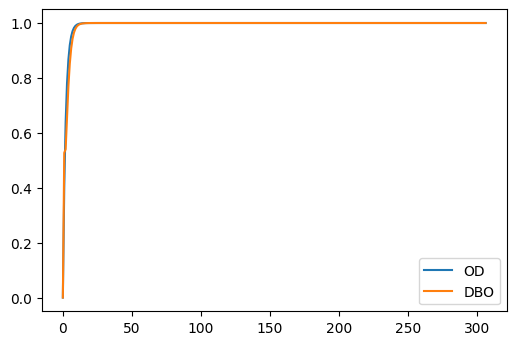

In [37]:
# Teste https://www.youtube.com/watch?v=VV3BnroVjZo&ab_channel=APMonitor.com
import numpy as np
from scipy.integrate import odeint

v_sed = dados_barragem['Vel. Vento média (m/s)']

print(len(v_sed))


# Função pro odeint
def model(z, t, temp, v_sed):
    P_org = z[0]
    P_ing = z[1]
    
    # Variáveis
    
    ##########
    k_mineral_20 = 1
    θ = 1
    α = 1
    k_mineral_s = 1
    
    k_mineral = k_mineral_20 * θ ** (temp - 20) * (α / (α + k_mineral_s))
    ##########
    
    ##########
    H = 1
    
    k_prec = v_sed / H
    k_prec = 1
    ##########
    
    r_pa = 0.5
    f_op = 0.5
    k_ra = 1
    
    # Fósforo orgânico:
    dP_orgdt_1 = r_pa * k_ra * f_op * α
    dP_orgdt_2 = r_pa * k_ra * f_op * α
    dP_orgdt_3 = - k_mineral * P_org
    
    dP_orgdt = dP_orgdt_1 + dP_orgdt_2 + dP_orgdt_3

    # Fósforo inorgânico:
    dP_ingdt_1 = r_pa * k_ra * (1 - f_op) * P_org
    dP_ingdt_2 = r_pa * k_ra * (1 - f_op) * P_org
    dP_ingdt_3 = k_mineral * P_org
    dP_ingdt_4 = - k_prec * P_ing
    
    dP_ingdt = dP_ingdt_1 + dP_ingdt_2 + dP_ingdt_3 + dP_ingdt_4 
    
    return [dP_orgdt, dP_ingdt]


# Condição inicial
z0 = [0.01, 1]

# Marcha no tempo
n = len(T)
t = np.linspace(0, n, n)
temp = np.array(T)
v_sed = np.array(v_sed)


P_org = np.zeros(n)
P_ing = np.zeros(n)

# Resolvendo a EDO
for i in range(1, n):
    tspan = [t[i - 1], t[i]]
    z = odeint(model, z0, t, args=(temp[i], v_sed[i]))
    z0 = z[1]
    P_org[i] = z0[0]
    P_ing[i] = z0[1]

plt.figure(dpi=100)
plt.plot(t, P_org, label='OD')
plt.plot(t, P_ing, label='DBO')
plt.legend()
plt.show()